# Doppler effect at 2 micro:

Tests of size of doppler effect and test linearity.
    

In [25]:
from __future__ import print_function, division
from PyAstronomy import pyasl
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## Size of doppler effect

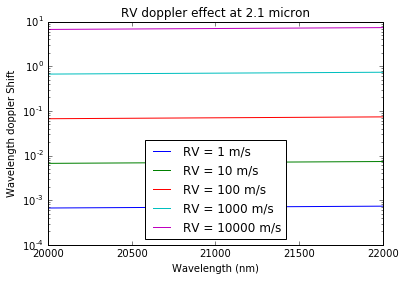

In [26]:
RVs = np.array([1, 10, 100, 1000, 10000]) # m/s 1m/s to 10km/s

wavelengths = np.linspace(2000, 2200, 1000)*10  # nm : 0.01 nm intervals
wavelengths = wavelengths * 10  # in Angstroms

plt.figure()
for rv in RVs:
    rv_km = rv/1000.  # turn into km/s
    __ , new_wavelengths = pyasl.dopplerShift(wavelengths, np.ones_like(wavelengths), rv_km, edgeHandling="firstlast")

    plt.semilogy(wavelengths/10, new_wavelengths-wavelengths, label="RV = {} m/s".format(rv))

plt.title("RV doppler effect at 2.1 micron")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Wavelength doppler Shift")
plt.legend(loc=0)
plt.show()

print()

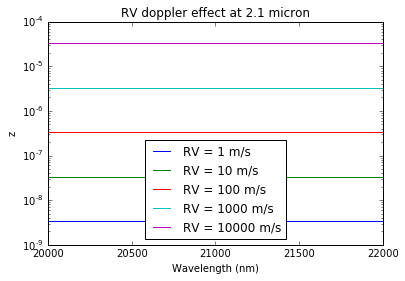

In [27]:
plt.figure()
for rv in RVs:
    rv_km = rv/1000.  # turn into km/s
    __ , new_wavelengths = pyasl.dopplerShift(wavelengths, np.ones_like(wavelengths), rv_km, edgeHandling="firstlast")

    plt.semilogy(wavelengths/10, (new_wavelengths-wavelengths)/wavelengths, label="RV = {} m/s".format(rv))

plt.title("RV doppler effect at 2.1 micron")
plt.xlabel("Wavelength (nm)")
plt.ylabel("z")
plt.legend(loc=0)
plt.show()

print()

z = []


In [28]:
wl = np.array([20000,30000]) #A
new_wls = []
z = []
for rv in RVs:
    __ , new_wl= pyasl.dopplerShift(wl, np.ones_like(wl), rv/1000., edgeHandling="firstlast")
    new_wls.append(new_wl)
    z.append((new_wl-wl)/wl)
    
print("wl = {}".format(wl))
print("RV     = {}".format(RVs))

print("new wl = {}".format(new_wls))
print("wl diff= {}".format(np.array(new_wls)-wl))
print("z      = {}".format(z))


wl = [20000 30000]
RV     = [    1    10   100  1000 10000]
new wl = [array([ 20000.00006671,  30000.00010007]), array([ 20000.00066713,  30000.00100069]), array([ 20000.00667128,  30000.01000692]), array([ 20000.06671282,  30000.10006923]), array([ 20000.66712819,  30001.00069229])]
wl diff= [[  6.67128188e-05   1.00069225e-04]
 [  6.67128188e-04   1.00069228e-03]
 [  6.67128191e-03   1.00069229e-02]
 [  6.67128190e-02   1.00069229e-01]
 [  6.67128190e-01   1.00069229e+00]]
z      = [array([  3.33564094e-09,   3.33564082e-09]), array([  3.33564094e-08,   3.33564094e-08]), array([  3.33564095e-07,   3.33564095e-07]), array([  3.33564095e-06,   3.33564095e-06]), array([  3.33564095e-05,   3.33564095e-05])]


# Linearity - True

In [45]:
# apply different RVs and then undo them all at once.
#Try same order and differnt order of mag

In [18]:
org_wl = np.array([4000, 7000, 20000,30000])  # A
RVs = np.array([13, 5, -13, 10, 23.5, 2, -10, -30.5])  # adding these values in order should return value to begining i think

In [22]:
# Low RV
low_RV = RVs/1000.

z_org = []
z_new = []
new_wls = []
iter_wl = org_wl
rv_sum = 0

for this_rv in low_RV:
    __ , new_wl = pyasl.dopplerShift(iter_wl, np.ones_like(iter_wl), this_rv, edgeHandling="firstlast")
    new_wls.append(new_wl)
    z_org.append((new_wl-org_wl)/org_wl)
    z_new.append((new_wl-iter_wl)/iter_wl)
    iter_wl = new_wl
    rv_sum += this_rv
    

#print(z_org)
print("Low RV values          = {0} km/s".format(low_RV))
print("Low RV Loop Difference = {0}".format(iter_wl - org_wl))


Low RV values          = [ 0.013   0.005  -0.013   0.01    0.0235  0.002  -0.01   -0.0305] km/s
Low RV Loop Difference = [ -4.50199877e-11  -7.91260391e-11  -2.25554686e-10  -3.34694050e-10]


In [20]:
# At m/s levels the wavelength values return to their original values after multiple shift with a total rv of 0.
# at mid and high RV they almost get back to same values. I think floating point cretes the errors.

In [23]:
# Med RV 
med_RV = RVs/10

z_org = []
z_new = []
new_wls = []
iter_wl = org_wl
rv_sum = 0

for this_rv in med_RV:
    __ , new_wl = pyasl.dopplerShift(iter_wl, np.ones_like(iter_wl), this_rv, edgeHandling="firstlast")
    new_wls.append(new_wl)
    z_org.append((new_wl-org_wl)/org_wl)
    z_new.append((new_wl-iter_wl)/iter_wl)
    iter_wl = new_wl
    rv_sum += this_rv
    
print(z_org)

#print(z_org)
print("Med RV values          = {0} km/s".format(med_RV))
print("Med RV Loop Difference = {0}".format(iter_wl - org_wl))

[array([  4.33633324e-06,   4.33633324e-06,   4.33633324e-06,
         4.33633324e-06]), array([  6.00416095e-06,   6.00416095e-06,   6.00416095e-06,
         6.00416095e-06]), array([  1.66780167e-06,   1.66780167e-06,   1.66780167e-06,
         1.66780167e-06]), array([  5.00344819e-06,   5.00344819e-06,   5.00344819e-06,
         5.00344819e-06]), array([  1.28422436e-05,   1.28422436e-05,   1.28422436e-05,
         1.28422436e-05]), array([  1.35093804e-05,   1.35093804e-05,   1.35093804e-05,
         1.35093804e-05]), array([  1.01736944e-05,   1.01736944e-05,   1.01736944e-05,
         1.01736944e-05]), array([ -1.14019031e-10,  -1.14018933e-10,  -1.14019167e-10,
        -1.14018985e-10])]
Med RV values          = [ 1.3   0.5  -1.3   1.    2.35  0.2  -1.   -3.05] km/s
Med RV Loop Difference = [ -4.56076123e-07  -7.98132533e-07  -2.28038334e-06  -3.42056956e-06]


In [24]:
#High RV 
high_RV = RVs*10

z_org = []
z_new = []
new_wls = []
iter_wl = org_wl
rv_sum = 0

for this_rv in high_RV:
    __ , new_wl = pyasl.dopplerShift(iter_wl, np.ones_like(iter_wl), this_rv, edgeHandling="firstlast")
    new_wls.append(new_wl)
    z_org.append((new_wl-org_wl)/org_wl)
    z_new.append((new_wl-iter_wl)/iter_wl)
    iter_wl = new_wl
    rv_sum += this_rv
    
#print(z_org)
print("High RV values          = {0} km/s".format(high_RV))
print("High RV Loop Difference = {0}".format(iter_wl - org_wl))

High RV values          = [ 130.   50. -130.  100.  235.   20. -100. -305.] km/s
High RV Loop Difference = [-0.00456151 -0.00798264 -0.02280753 -0.0342113 ]


In [ ]:
# From this I think that the RV is linear and you can apply a bunch of different rv shifts after each other
# There is jsut an issue with floating point precision